In [575]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\HDFC_Internship\DATA\Fraud_Data_Final.csv")

In [3]:
df.shape

(73385, 9)

In [4]:
df.size

660465

In [5]:
df.head()

SERIAL NUMBER  TRANSACTION_ID             DATETIME  CUSTOMER_ID  \
0              0         1653444  2018-09-20 11:49:41            0   
1              1         1657926  2018-09-20 20:21:57            0   
2              2         1174679  2018-08-01 12:11:36            0   
3              3         1175894  2018-08-01 13:58:40            0   
4              4          758479   2018-06-19 4:18:11            0   

  TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
0              Hotels              88.11      14903381   
1             Grocery              78.25      14934117   
2             Airways              62.28      10584696   
3             Airways              80.16      10591120   
4          Insulation              90.07       6841091   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
0                           172      0  
1                           172      0  
2                           122      0  
3                           122      0  
4                            79      0

In [6]:
df.tail()

SERIAL NUMBER  TRANSACTION_ID             DATETIME  CUSTOMER_ID  \
73380          38095          903947   2018-07-04 7:55:16         2015   
73381          38096          243562  2018-04-26 10:24:24         2015   
73382          38098          773468  2018-06-20 13:49:15         2015   
73383          38100         1177522  2018-08-01 16:44:45         2016   
73384          38101          948456  2018-07-08 17:53:44         2016   

      TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
73380              Retail              63.03       8150116   
73381              Retail              45.23       2197464   
73382              Retail              31.59       6961755   
73383              Retail              27.61      10601085   
73384              Retail              11.41       8531624   

       DAYS_SINCE_FIRST_TRANSACTION  FRAUD  
73380                            94      0  
73381                            25      0  
73382                            80      0  
73383                           122      0  
73384                            98      0

In [7]:
df.describe(include='all')

SERIAL NUMBER  TRANSACTION_ID             DATETIME   CUSTOMER_ID  \
count    73385.000000    7.338500e+04                73385  73385.000000   
unique            NaN             NaN                70904           NaN   
top               NaN             NaN  2018-04-05 13:03:35           NaN   
freq              NaN             NaN                    4           NaN   
mean     41048.878204    8.233976e+05                  NaN   2173.954514   
std      26492.483939    5.479239e+05                  NaN   1409.347516   
min          0.000000    6.295000e+03                  NaN      0.000000   
25%      18346.000000    4.632880e+05                  NaN    967.000000   
50%      36692.000000    7.594650e+05                  NaN   1941.000000   
75%      63533.000000    1.347494e+06                  NaN   3334.000000   
max      93756.000000    1.754143e+06                  NaN   4998.000000   

       TYPE of TRANSACTION  TRASCATION AMOUNT  TIME_SECONDS  \
count                73385       73385.000000  7.338500e+04   
unique                  10                NaN           NaN   
top             Insulation                NaN           NaN   
freq                  9512                NaN           NaN   
mean                   NaN          55.177761  7.419868e+06   
std                    NaN          43.472514  4.939476e+06   
min                    NaN           0.000000  5.153000e+04   
25%                    NaN          21.790000  4.177458e+06   
50%                    NaN          46.030000  6.850855e+06   
75%                    NaN          78.990000  1.214317e+07   
max                    NaN        1108.850000  1.581077e+07   

        DAYS_SINCE_FIRST_TRANSACTION         FRAUD  
count                   73385.000000  73385.000000  
unique                           NaN           NaN  
top                              NaN           NaN  
freq                             NaN           NaN  
mean                       85.383307      0.008939  
std                        57.169018      0.094124  
min                         0.000000      0.000000  
25%                        48.000000      0.000000  
50%                        79.000000      0.000000  
75%                       140.000000      0.000000  
max                       182.000000      1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73385 entries, 0 to 73384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SERIAL NUMBER                 73385 non-null  int64  
 1   TRANSACTION_ID                73385 non-null  int64  
 2   DATETIME                      73385 non-null  object 
 3   CUSTOMER_ID                   73385 non-null  int64  
 4   TYPE of TRANSACTION           73385 non-null  object 
 5   TRASCATION AMOUNT             73385 non-null  float64
 6   TIME_SECONDS                  73385 non-null  int64  
 7   DAYS_SINCE_FIRST_TRANSACTION  73385 non-null  int64  
 8   FRAUD                         73385 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.0+ MB


In [9]:
df.isnull().sum()

SERIAL NUMBER                   0
TRANSACTION_ID                  0
DATETIME                        0
CUSTOMER_ID                     0
TYPE of TRANSACTION             0
TRASCATION AMOUNT               0
TIME_SECONDS                    0
DAYS_SINCE_FIRST_TRANSACTION    0
FRAUD                           0
dtype: int64

In [10]:
df.dtypes.value_counts()

int64      6
object     2
float64    1
dtype: int64

In [65]:
df = df.drop("SERIAL NUMBER", axis = 1)

In [12]:
df['FRAUD'].value_counts(normalize=True)

0    0.991061
1    0.008939
Name: FRAUD, dtype: float64

In [13]:
df['TYPE of TRANSACTION'].value_counts().count()

10

In [14]:
df['TYPE of TRANSACTION'].value_counts()

Insulation     9512
Food           9211
Electronics    7931
Clothing       7394
Grocery        7115
Retail         7000
Footwear       6621
Airways        6584
Hotels         6086
Rental Car     5931
Name: TYPE of TRANSACTION, dtype: int64

In [15]:
df['TYPE of TRANSACTION'][df["FRAUD"] == 1].value_counts()

Food           107
Insulation      91
Electronics     77
Retail          73
Airways         66
Hotels          65
Grocery         63
Footwear        51
Rental Car      42
Clothing        21
Name: TYPE of TRANSACTION, dtype: int64

In [16]:
df['TYPE of TRANSACTION'][df["FRAUD"] == 0].value_counts()

Insulation     9421
Food           9104
Electronics    7854
Clothing       7373
Grocery        7052
Retail         6927
Footwear       6570
Airways        6518
Hotels         6021
Rental Car     5889
Name: TYPE of TRANSACTION, dtype: int64

In [17]:
df['CUSTOMER_ID'].value_counts().count()

3456

In [18]:
df['CUSTOMER_ID'].value_counts()

1848    57
571     57
1157    57
98      56
1881    55
        ..
2288     1
2145     1
4917     1
2023     1
1896     1
Name: CUSTOMER_ID, Length: 3456, dtype: int64

In [19]:
df['CUSTOMER_ID'][df["FRAUD"] == 1].value_counts()

1692    5
613     5
701     5
1085    5
1743    5
       ..
1719    1
1708    1
1706    1
1693    1
1992    1
Name: CUSTOMER_ID, Length: 536, dtype: int64

In [20]:
df['CUSTOMER_ID'][df["FRAUD"] == 0].value_counts()

571     57
1848    57
1157    57
98      56
1881    55
        ..
2357     1
2288     1
2145     1
4917     1
1896     1
Name: CUSTOMER_ID, Length: 3455, dtype: int64

In [21]:
df["TYPE of TRANSACTION"][df["FRAUD"] == 0].value_counts(normalize=True, sort=False)

Hotels         0.082787
Grocery        0.096963
Airways        0.089620
Insulation     0.129536
Footwear       0.090335
Clothing       0.101376
Food           0.125177
Rental Car     0.080972
Electronics    0.107990
Retail         0.095244
Name: TYPE of TRANSACTION, dtype: float64

In [22]:
df["TYPE of TRANSACTION"][df["FRAUD"] == 0].value_counts(normalize=True, sort=False)

Hotels         0.082787
Grocery        0.096963
Airways        0.089620
Insulation     0.129536
Footwear       0.090335
Clothing       0.101376
Food           0.125177
Rental Car     0.080972
Electronics    0.107990
Retail         0.095244
Name: TYPE of TRANSACTION, dtype: float64

In [88]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_le = df.copy()
df_le['TYPE of TRANSACTION']= le.fit_transform(df_le['TYPE of TRANSACTION'])
  
df_le['TYPE of TRANSACTION'].unique()

d = dict(zip(le.classes_, le.transform(le.classes_)))
print(d)

{'Airways': 0, 'Clothing': 1, 'Electronics': 2, 'Food': 3, 'Footwear': 4, 'Grocery': 5, 'Hotels': 6, 'Insulation': 7, 'Rental Car': 8, 'Retail': 9}


In [67]:
df_le.head()

TRANSACTION_ID            DATETIME  CUSTOMER_ID  TYPE of TRANSACTION  \
0         1653444 2018-09-20 11:49:41            0                    6   
1         1657926 2018-09-20 20:21:57            0                    5   
2         1174679 2018-08-01 12:11:36            0                    0   
3         1175894 2018-08-01 13:58:40            0                    0   
4          758479 2018-06-19 04:18:11            0                    7   

   TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  FRAUD  month        date  \
0              88.11                           172      0      9  2018-09-20   
1              78.25                           172      0      9  2018-09-20   
2              62.28                           122      0      8  2018-08-01   
3              80.16                           122      0      8  2018-08-01   
4              90.07                            79      0      6  2018-06-19   

   quarter  dayofweek weekday_name  time  
0        3          3     Thursday    11  
1        3          3     Thursday    20  
2        3          2    Wednesday    12  
3        3          2    Wednesday    13  
4        2          1      Tuesday     4

<AxesSubplot:>

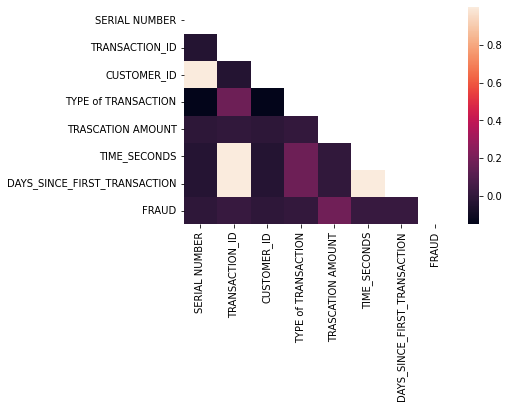

In [25]:
mask = np.triu(np.ones_like(df_le.corr(), dtype=bool))
df_le_corr = df_le.corr()
sns.heatmap(df_le_corr, mask=mask)

In [26]:
classes=df['FRAUD'].value_counts()
normal_share=round(classes[0]/df['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.11, 0.89)

In [27]:
classes

0    72729
1      656
Name: FRAUD, dtype: int64

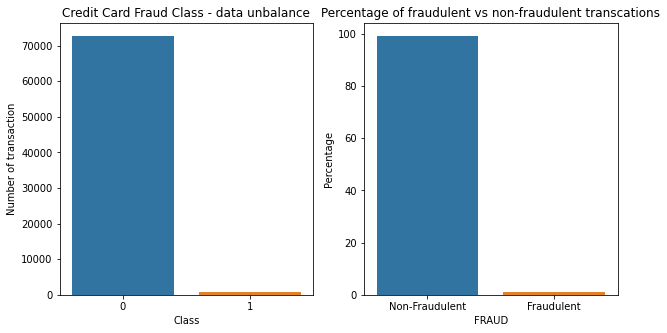

In [28]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df["FRAUD"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'FRAUD':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x=df_fraud_percentage['FRAUD'], y=df_fraud_percentage['Percentage'])
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [29]:
# drop unnecessary columns
# df = df.drop("SERIAL NUMBER", axis = 1)
df = df.drop("TIME_SECONDS", axis = 1)

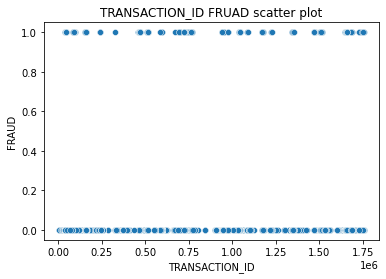

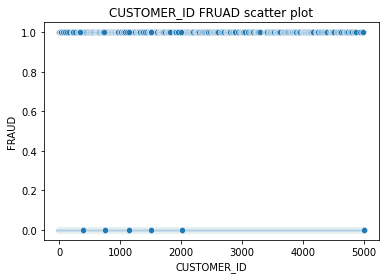

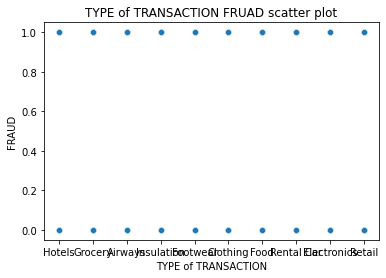

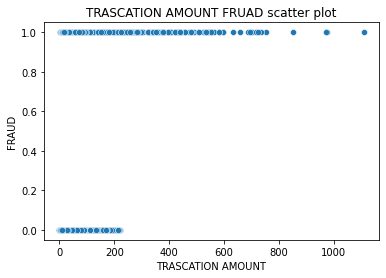

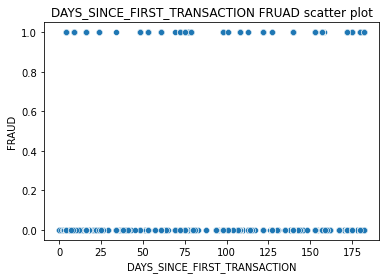

In [30]:
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    sns.scatterplot(x = df[f], y = df["FRAUD"])
    title = f + " FRUAD scatter plot"
    plt.title(title)
    plt.show()
    

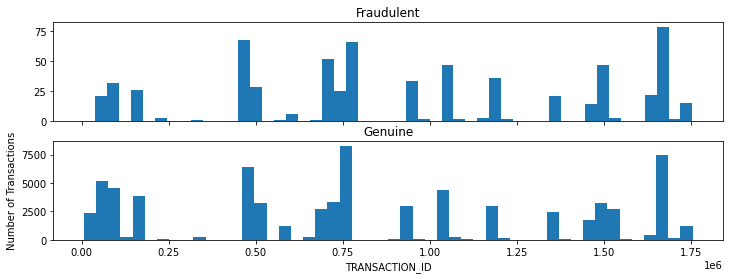

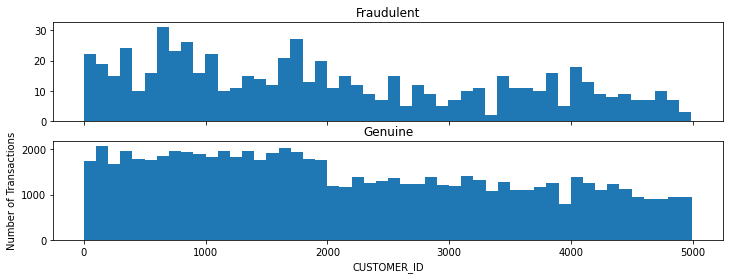

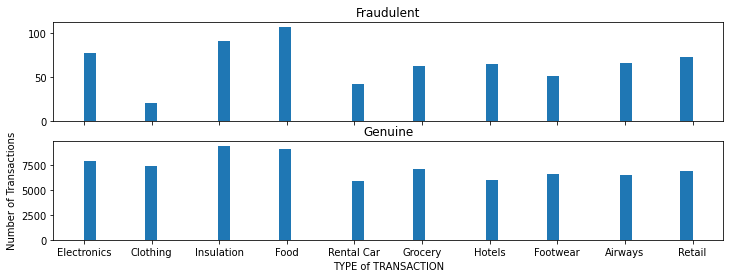

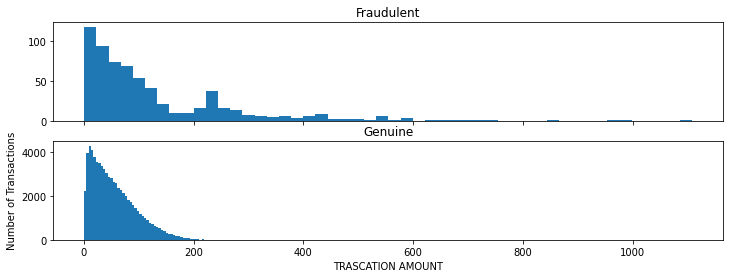

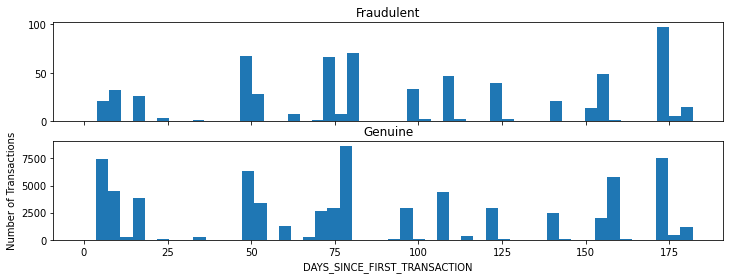

In [31]:
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    ax1.hist(df[f][df["FRAUD"] == 1], bins = 50)
    ax1.set_title('Fraudulent')

    ax2.hist(df[f][df["FRAUD"] == 0], bins = 50)
    ax2.set_title('Genuine')

    plt.xlabel(f)
    plt.ylabel('Number of Transactions')
    plt.show()

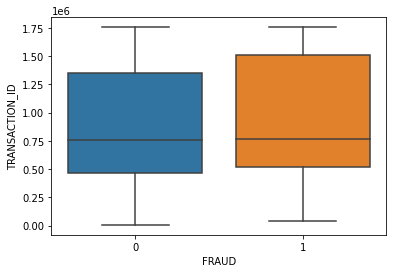

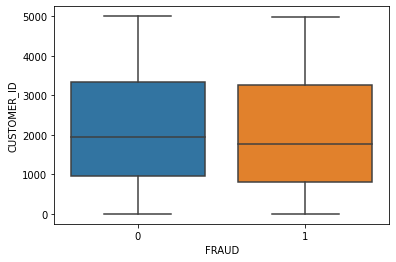

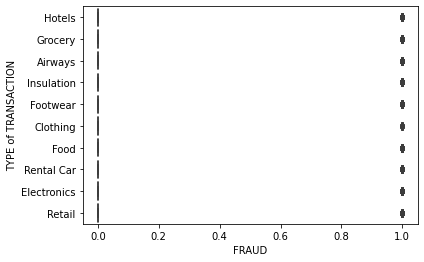

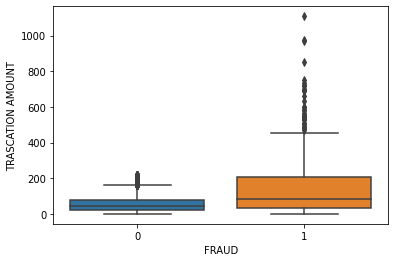

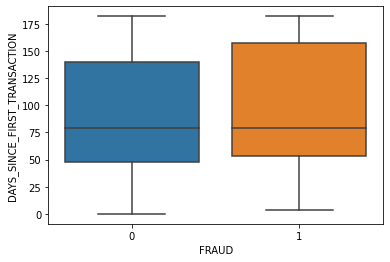

In [32]:
#Boxplot for the features, in order to visualiza the outliers.

features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.boxplot(x=df['FRAUD'], y=df[f])
    plt.show()
    

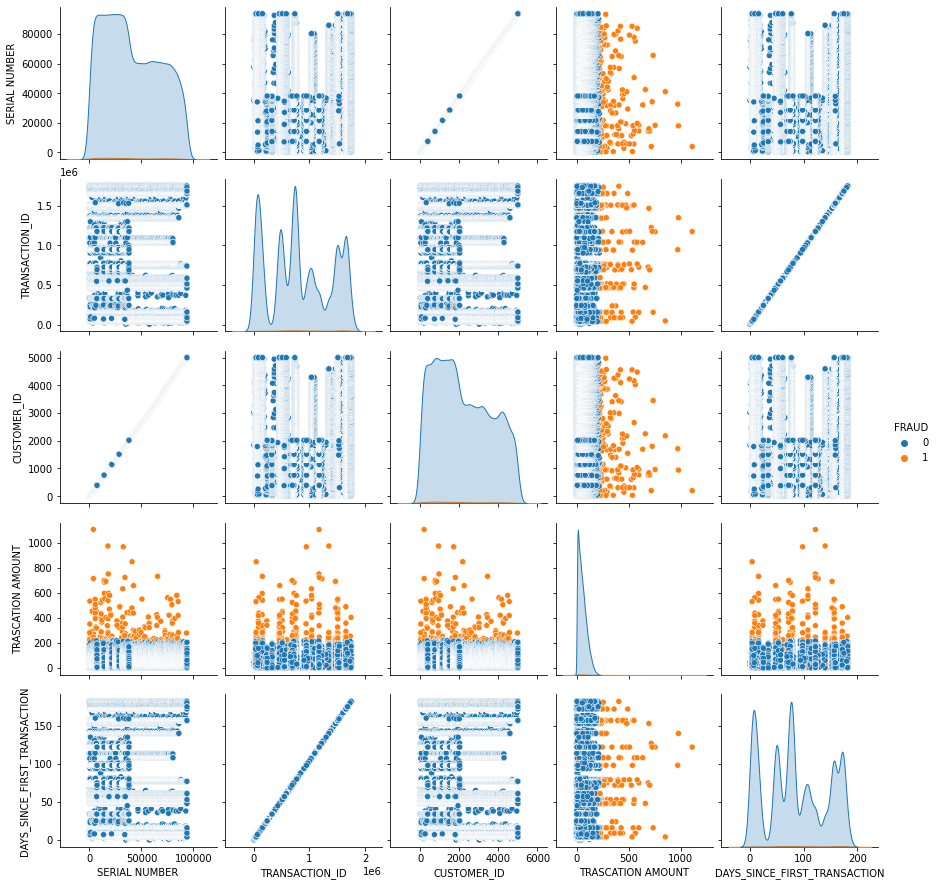

In [33]:
sns.pairplot(df,hue='FRAUD')

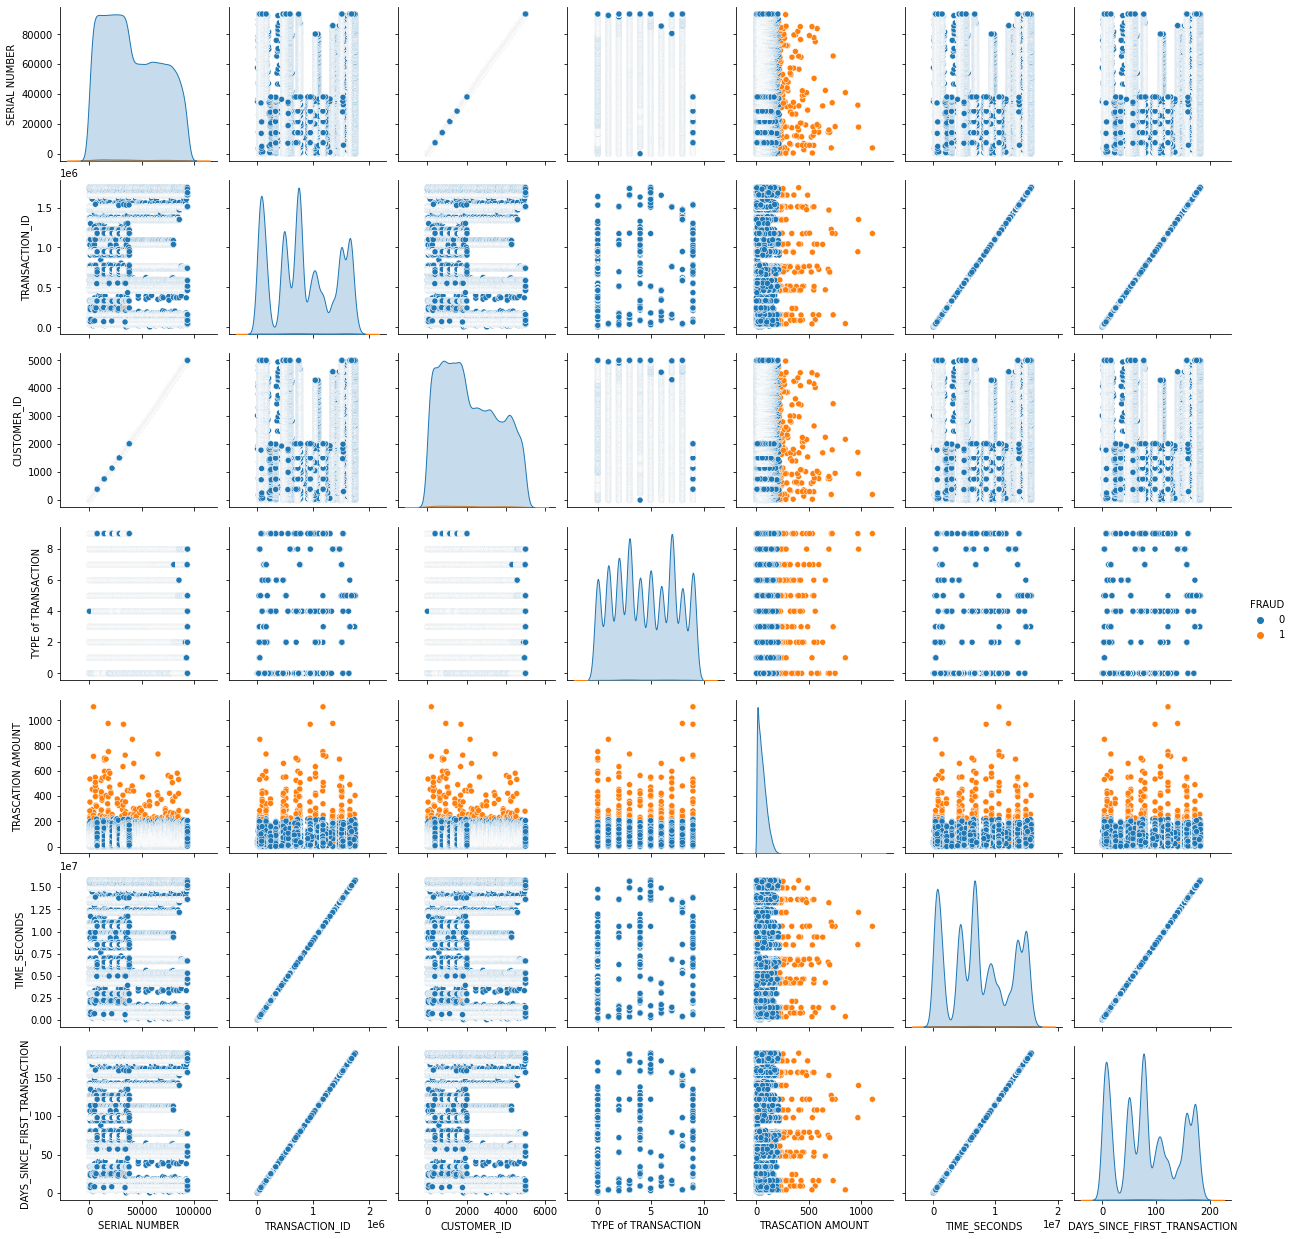

In [34]:
sns.pairplot(df_le,hue='FRAUD')

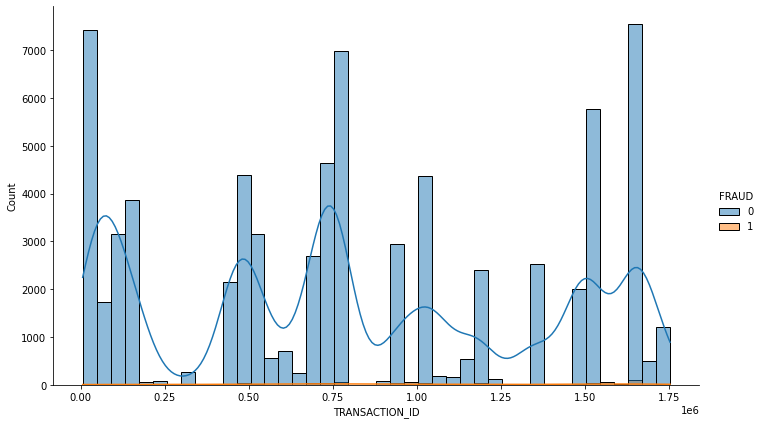

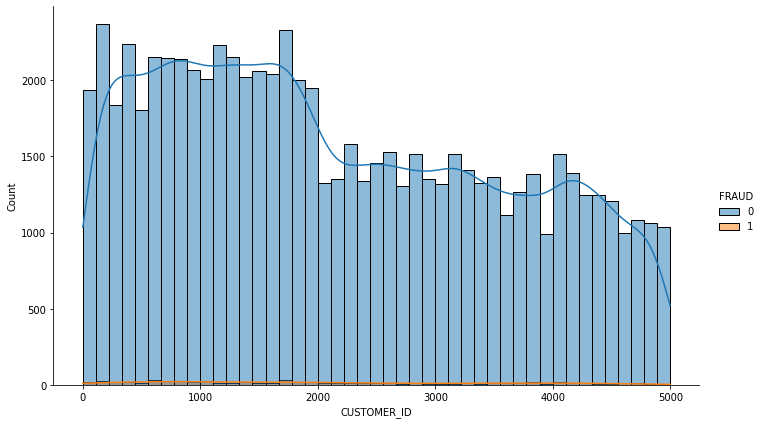

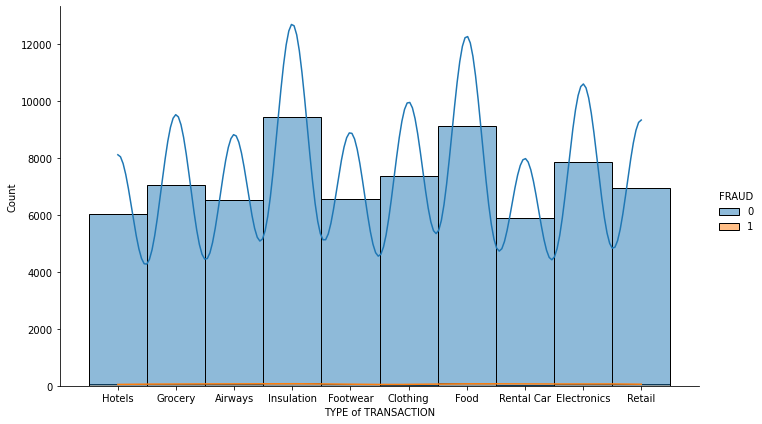

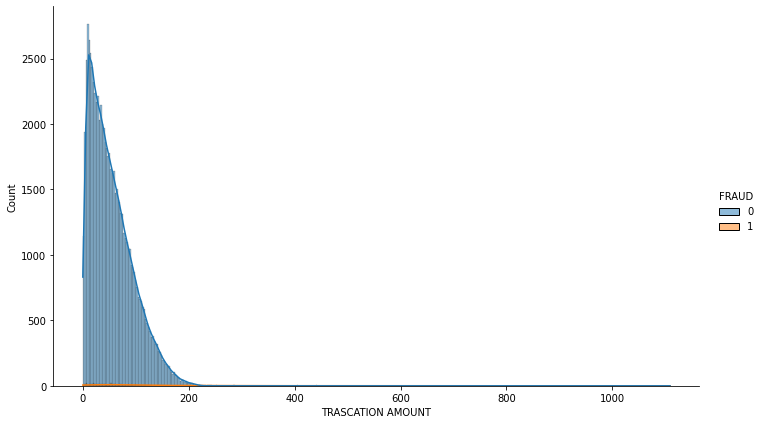

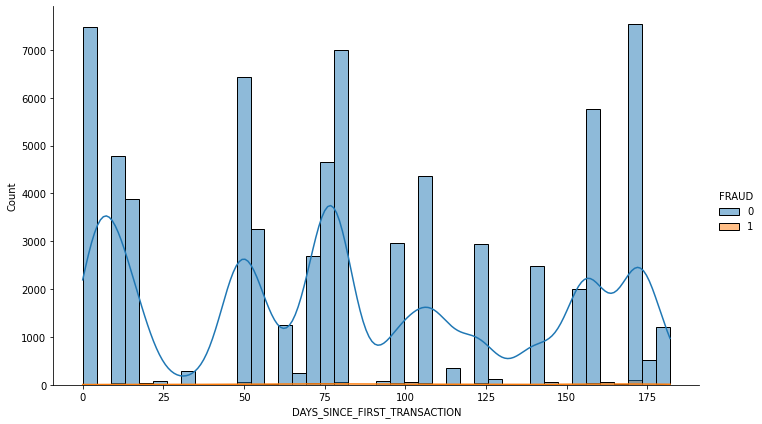

In [35]:
# identifying the distribution in the columns
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.displot(x = df[f],kde=True,height=6,aspect=1.67, hue='FRAUD', data = df)
    plt.show()

In [36]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [37]:
df['month'] = df['DATETIME'].dt.month

In [38]:
df['date'] = df['DATETIME'].dt.date

In [39]:
df['year'] = df['DATETIME'].dt.year

In [40]:
df['quarter'] = df['DATETIME'].dt.quarter

In [41]:
df['dayofweek'] = df['DATETIME'].dt.dayofweek

In [42]:
df['weekday_name'] = df['DATETIME'].dt.day_name()

In [43]:
df['time'] = df['DATETIME'].dt.hour

In [44]:
df.year.unique()

array([2018], dtype=int64)

In [45]:
df.drop('year', axis = 1, inplace=True)

In [46]:
df.month.unique()

array([9, 8, 6, 7, 4, 5], dtype=int64)

In [47]:
df.month.value_counts()

9    17271
4    16403
6    16003
5    10115
7     7891
8     5702
Name: month, dtype: int64

In [48]:
df['month'][df["FRAUD"] == 1].value_counts()

9    181
6    151
5     96
7     84
4     82
8     62
Name: month, dtype: int64

In [49]:
df['dayofweek'].unique()

array([3, 2, 1, 6, 4, 5, 0], dtype=int64)

In [50]:
df['dayofweek'][df["FRAUD"] == 1].value_counts()

1    162
3    147
2    140
5     84
6     74
4     45
0      4
Name: dayofweek, dtype: int64

In [51]:
df['dayofweek'].value_counts()

3    18376
1    18340
2    13582
5     9088
6     8706
4     4728
0      565
Name: dayofweek, dtype: int64

In [52]:
df.quarter.unique()

array([3, 2], dtype=int64)

In [53]:
df['quarter'][df["FRAUD"] == 1].value_counts()

2    329
3    327
Name: quarter, dtype: int64

In [54]:
df['quarter'].value_counts()

2    42521
3    30864
Name: quarter, dtype: int64

In [55]:
df.head()

SERIAL NUMBER  TRANSACTION_ID            DATETIME  CUSTOMER_ID  \
0              0         1653444 2018-09-20 11:49:41            0   
1              1         1657926 2018-09-20 20:21:57            0   
2              2         1174679 2018-08-01 12:11:36            0   
3              3         1175894 2018-08-01 13:58:40            0   
4              4          758479 2018-06-19 04:18:11            0   

  TYPE of TRANSACTION  TRASCATION AMOUNT  DAYS_SINCE_FIRST_TRANSACTION  FRAUD  \
0              Hotels              88.11                           172      0   
1             Grocery              78.25                           172      0   
2             Airways              62.28                           122      0   
3             Airways              80.16                           122      0   
4          Insulation              90.07                            79      0   

   month        date  quarter  dayofweek weekday_name  time  
0      9  2018-09-20        3          3     Thursday    11  
1      9  2018-09-20        3          3     Thursday    20  
2      8  2018-08-01        3          2    Wednesday    12  
3      8  2018-08-01        3          2    Wednesday    13  
4      6  2018-06-19        2          1      Tuesday     4

<AxesSubplot:>

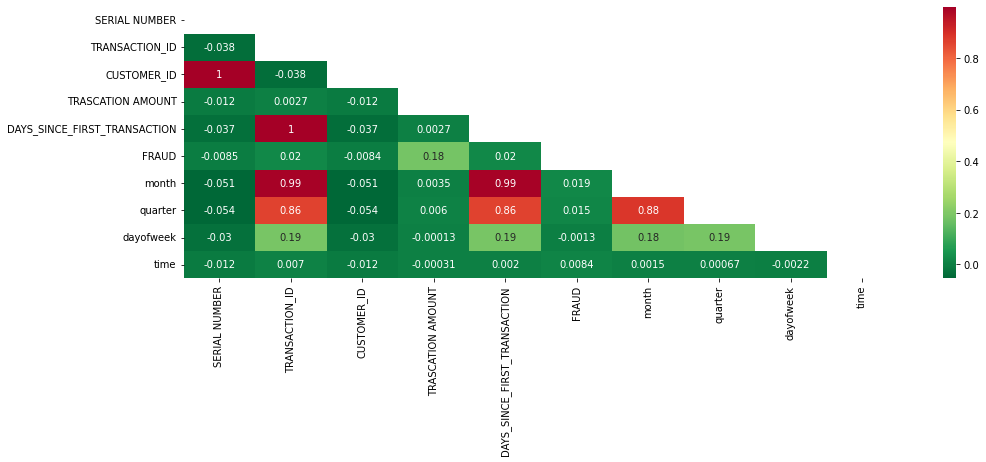

In [56]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='RdYlGn_r',annot=True, mask=mask)

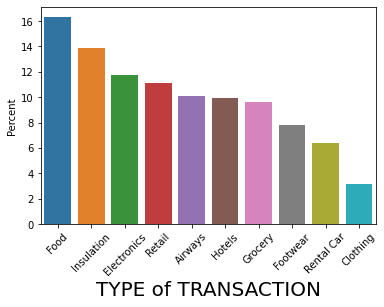

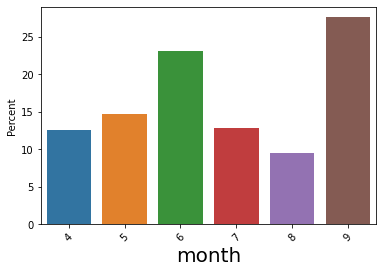

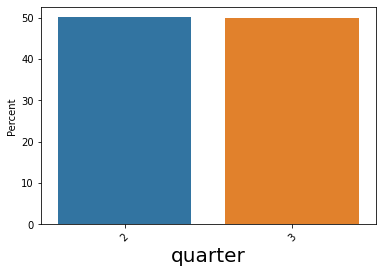

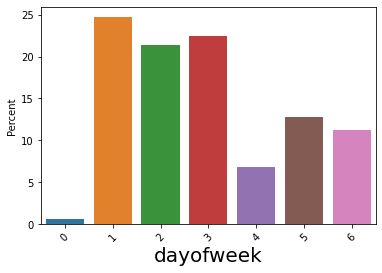

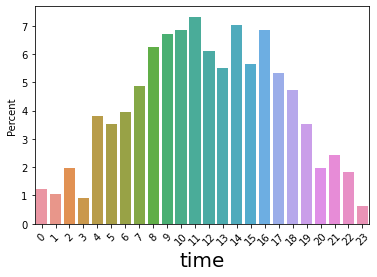

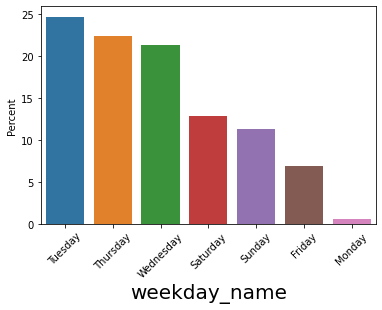

In [57]:
features = ["TYPE of TRANSACTION", "month","quarter","dayofweek","time","weekday_name"]
for f in features:
    
    Feature = df[f][df["FRAUD"] == 1].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 1].value_counts(normalize=True).values
    # df_TOT= pd.DataFrame({'TOT':TOT, 'Percent':perc})

    ax = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent')

    ax.set_xlabel(f, fontsize = 20)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

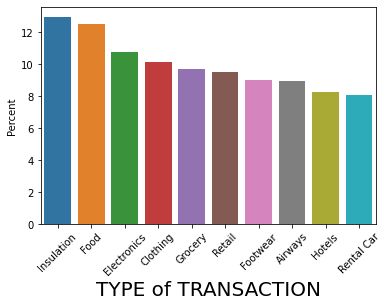

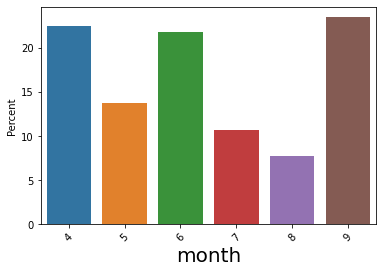

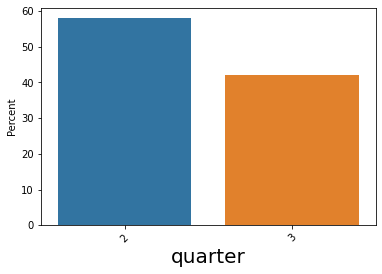

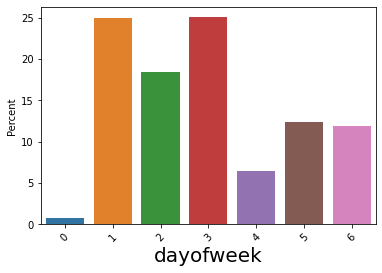

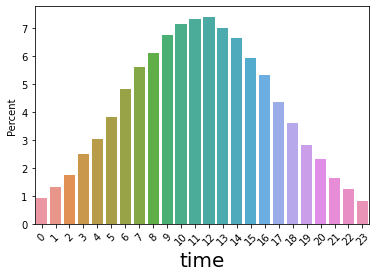

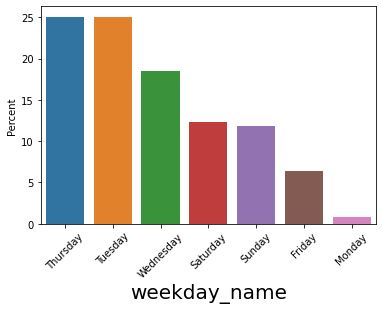

In [58]:
features = ["TYPE of TRANSACTION", "month","quarter","dayofweek","time","weekday_name"]
for f in features:
    
    Feature = df[f][df["FRAUD"] == 0].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 0].value_counts(normalize=True).values
    # df_TOT= pd.DataFrame({'TOT':TOT, 'Percent':perc})

    ax = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent')

    ax.set_xlabel(f, fontsize = 20)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

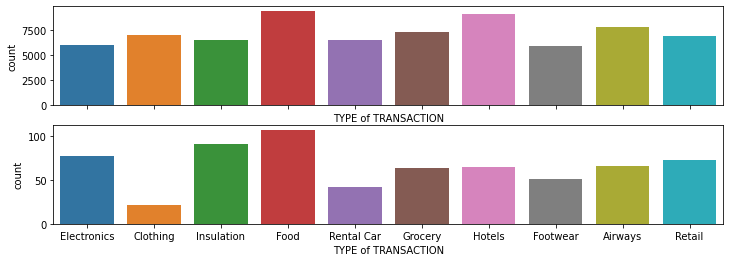

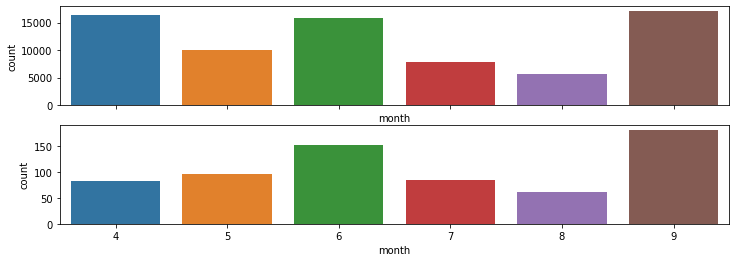

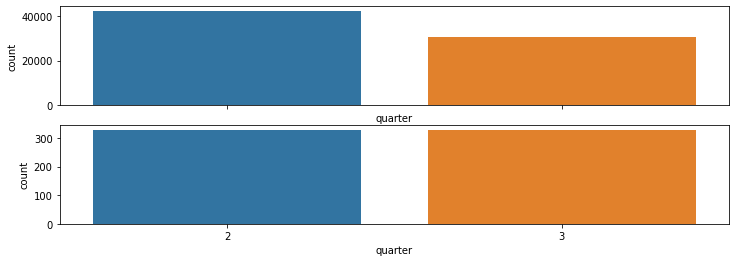

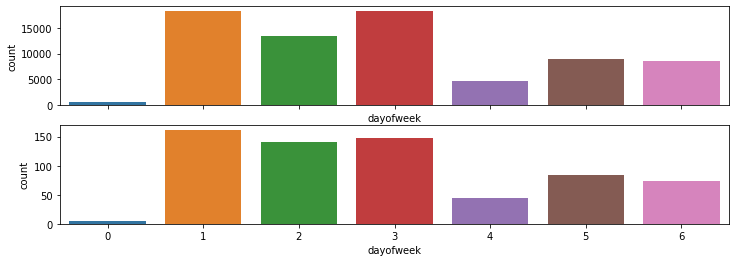

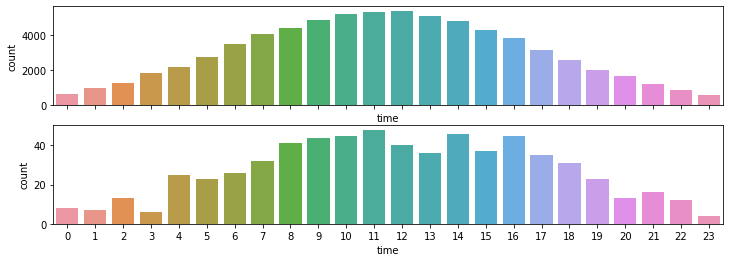

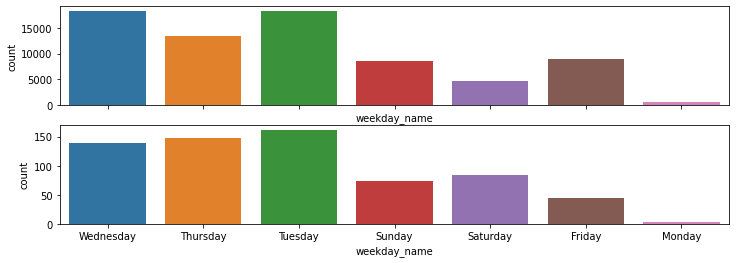

In [59]:
features = ["TYPE of TRANSACTION", "month", "quarter","dayofweek","time","weekday_name"]
for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    sns.countplot(x=df[f][df["FRAUD"] == 0], data=df, ax=ax1)


    sns.countplot(x=df[f][df["FRAUD"] == 1], data=df, ax=ax2)


In [60]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X = X.copy()
    X["intercept"] = 1

    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [61]:
# # features to consider removing
# considered_features = ["TYPE of TRANSACTION", "month", "quarter","dayofweek","time","weekday_name"]
considered_features = ['TRANSACTION_ID','CUSTOMER_ID','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable           VIF
0                TRANSACTION_ID  38733.181657
3  DAYS_SINCE_FIRST_TRANSACTION  38732.798497
1                   CUSTOMER_ID      1.002222
2             TRASCATION AMOUNT      1.000141

In [62]:
considered_features.remove('TRANSACTION_ID')
compute_vif(considered_features)

Variable       VIF
0                   CUSTOMER_ID  1.001538
1             TRASCATION AMOUNT  1.000138
2  DAYS_SINCE_FIRST_TRANSACTION  1.001412

Splitting the data into test and train

In [96]:
# df_le.drop(["DATETIME","weekday_name","date","TRANSACTION_ID"],axis=1)
df_le = df_le.drop(["DATETIME","date","weekday_name"],axis=1)

<Figure size 432x288 with 0 Axes>

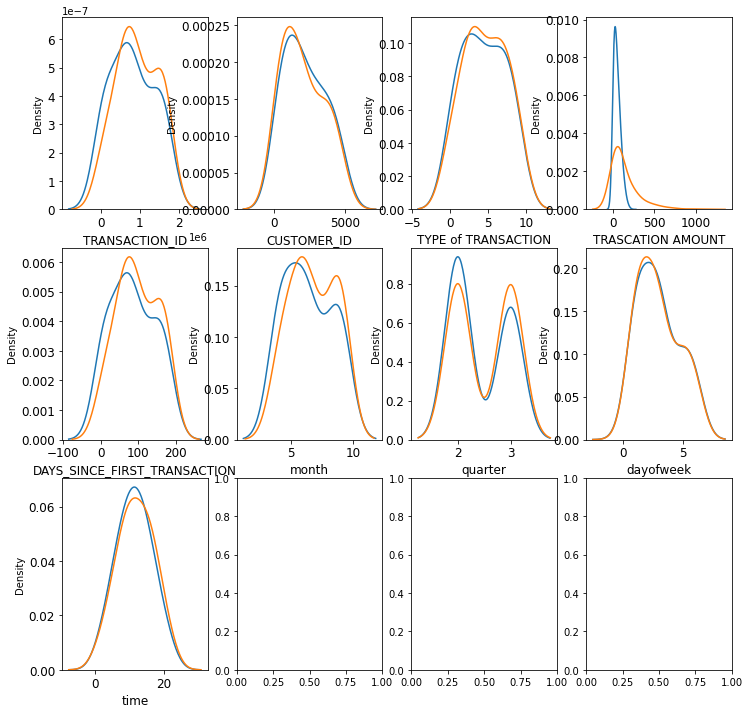

In [114]:
# Plotting all the variable in displot to visualise the distribution
var = list(df_le.columns.values)
# dropping Class columns from the list
var.remove("FRAUD")

i = 0
t0 = df_le.loc[df['FRAUD'] == 0]
t1 = df_le.loc[df['FRAUD'] == 1]

plt.figure()
fig, ax = plt.subplots(3,4,figsize=(12,12))

for feature in var:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [97]:
df_le.head()

TRANSACTION_ID  CUSTOMER_ID  TYPE of TRANSACTION  TRASCATION AMOUNT  \
0         1653444            0                    6              88.11   
1         1657926            0                    5              78.25   
2         1174679            0                    0              62.28   
3         1175894            0                    0              80.16   
4          758479            0                    7              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  FRAUD  month  quarter  dayofweek  time  
0                           172      0      9        3          3    11  
1                           172      0      9        3          3    20  
2                           122      0      8        3          2    12  
3                           122      0      8        3          2    13  
4                            79      0      6        2          1     4

In [265]:
y= df_le["FRAUD"]
X = df_le.drop("FRAUD", axis = 1)

In [266]:
X.head()

TRANSACTION_ID  CUSTOMER_ID  TYPE of TRANSACTION  TRASCATION AMOUNT  \
0         1653444            0                    6              88.11   
1         1657926            0                    5              78.25   
2         1174679            0                    0              62.28   
3         1175894            0                    0              80.16   
4          758479            0                    7              90.07   

   DAYS_SINCE_FIRST_TRANSACTION  month  quarter  dayofweek  time  
0                           172      9        3          3    11  
1                           172      9        3          3    20  
2                           122      8        3          2    12  
3                           122      8        3          2    13  
4                            79      6        2          1     4

In [309]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)

X_scaled = scalar.transform(X)

In [ ]:
# PCA or not
# X_scaled = X

In [310]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [311]:
X_scaled_df.head()

TRANSACTION_ID  CUSTOMER_ID  TYPE of TRANSACTION  TRASCATION AMOUNT  \
0        1.514904    -1.542536             0.549311           0.757547   
1        1.523084    -1.542536             0.195126           0.530735   
2        0.641118    -1.542536            -1.575799           0.163374   
3        0.643335    -1.542536            -1.575799           0.574671   
4       -0.118482    -1.542536             0.903496           0.802633   

   DAYS_SINCE_FIRST_TRANSACTION     month  quarter  dayofweek      time  
0                      1.515109  1.414344  1.17375   0.023567 -0.074504  
1                      1.515109  1.414344  1.17375   0.023567  1.702634  
2                      0.640503  0.873673  1.17375  -0.565696  0.122956  
3                      0.640503  0.873673  1.17375  -0.565696  0.320416  
4                     -0.111658 -0.207671 -0.85197  -1.154958 -1.456722

In [313]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state = 42)

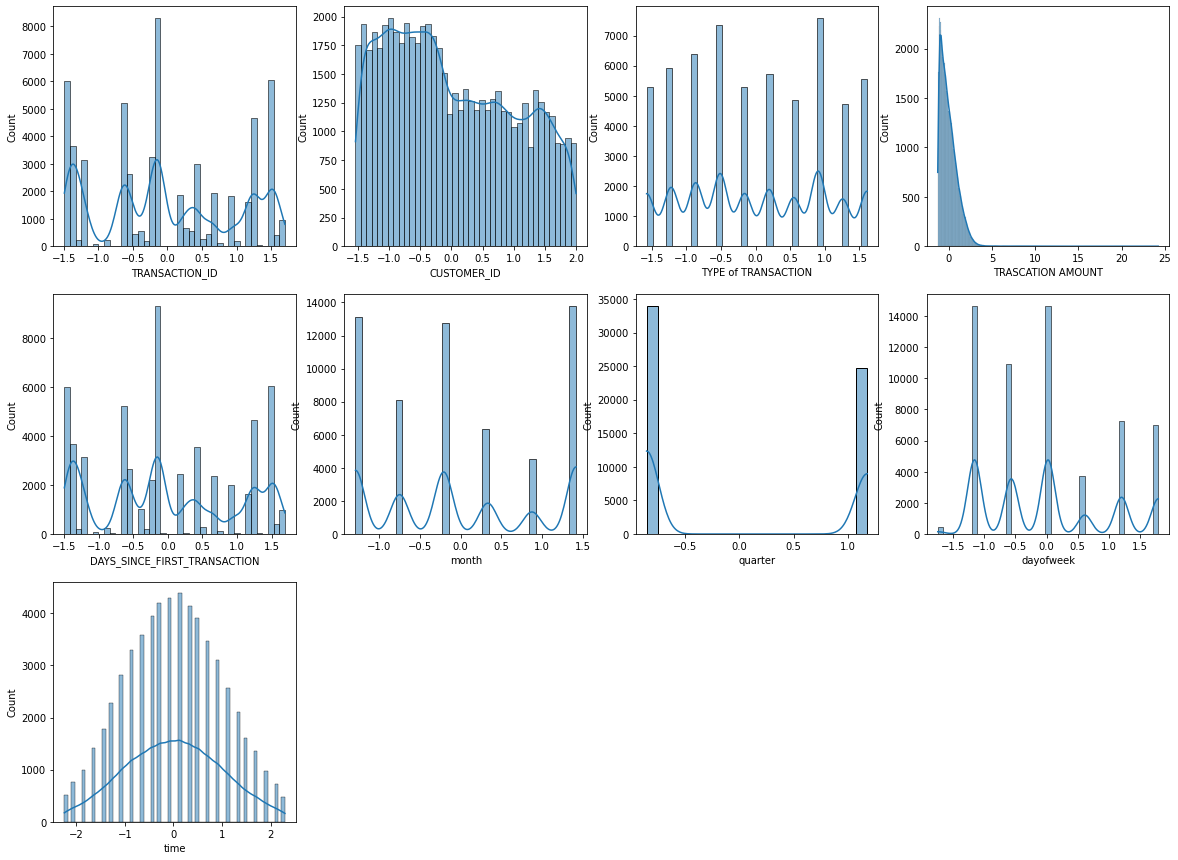

In [314]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))

i=0
for col in var:
    i += 1
    plt.subplot(3,4, i)
    sns.histplot(X_train[col],kde=True)

plt.show()

In [315]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features  TRANSACTION_ID  CUSTOMER_ID  TYPE of TRANSACTION  TRASCATION AMOUNT  \
Skewness        0.129881     0.302116             0.049948           2.455001   

Features  DAYS_SINCE_FIRST_TRANSACTION     month   quarter  dayofweek  \
Skewness                      0.131036  0.183828  0.321094   0.454348   

Features      time  
Skewness  0.022936

In [316]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)


Index(['TRASCATION AMOUNT'], dtype='object', name='Features')


In [317]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

# Model Building with Imbalance data

## 1.Logistic Regression

In [373]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} # larger C - more prone to overfit
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6784780588392854
Best hyperparameters:  {'C': 1000}


In [374]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.115489      0.015470         0.008378        0.000489    0.01   
1       0.167713      0.027756         0.013297        0.003876     0.1   
2       0.172235      0.032397         0.010306        0.002733       1   
3       0.160351      0.010862         0.010463        0.006249      10   
4       0.213767      0.052731         0.008377        0.001850     100   
5       0.173427      0.044330         0.005014        0.003073    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.708304           0.705573           0.702026   
1   {'C': 0.1}           0.708600           0.706129           0.700694   
2     {'C': 1}           0.710435           0.707900           0.701836   
3    {'C': 10}           0.711115           0.708512           0.702324   
4   {'C': 100}           0.711270           0.708605           0.702356   
5  {'C': 1000}           0.711927           0.708618           0.702360   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.626590  ...         0.676392        0.035695                5   
1           0.626306  ...         0.676120        0.035856                6   
2           0.627667  ...         0.677649        0.035945                4   
3           0.628066  ...         0.678186        0.036022                3   
4           0.628071  ...         0.678272        0.036039                2   
5           0.628078  ...         0.678478        0.036088                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.673210            0.672941            0.672075   
1            0.672641            0.672640            0.671877   
2            0.674020            0.674005            0.673383   
3            0.674487            0.674482            0.673895   
4            0.674585            0.674545            0.673956   
5            0.674892            0.674556            0.673963   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.688843            0.685401          0.678494         0.007138  
1            0.688806            0.685383          0.678270         0.007292  
2            0.690517            0.687147          0.679814         0.007443  
3            0.691071            0.687779          0.680343         0.007492  
4            0.691135            0.687921          0.680428         0.007503  
5            0.691141            0.688345          0.680579         0.007540  

[6 rows x 21 columns]

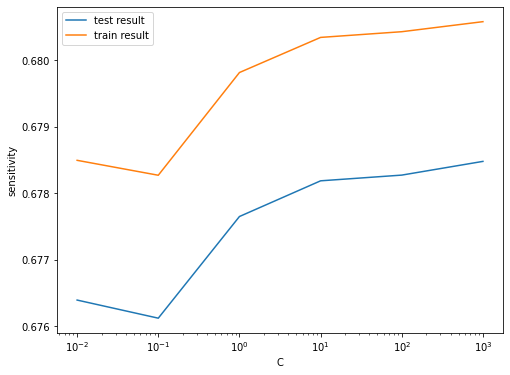

In [375]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

## Logistic Regression with hyperparameter tuning

In [376]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [377]:
model_cv.best_params_


{'C': 1000}

In [378]:
# Instantiating the model
log_reg_imb_model = LogisticRegression(C=1000)

# Fitting the model with train data
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=1000)

In [379]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [380]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [381]:
# Printing scores
display_scores(y_train, y_train_pred)

F1 Score: 1.17%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     58196
           1       1.00      0.01      0.01       512

    accuracy                           0.99     58708
   macro avg       1.00      0.50      0.50     58708
weighted avg       0.99      0.99      0.99     58708



In [382]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [383]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

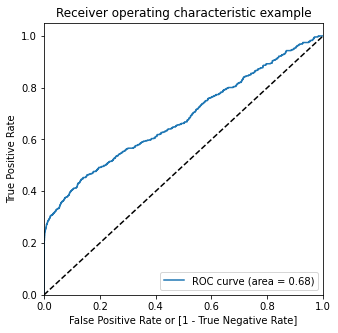

In [384]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [385]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 0.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14533
           1       0.00      0.00      0.00       144

    accuracy                           0.99     14677
   macro avg       0.50      0.50      0.50     14677
weighted avg       0.98      0.99      0.99     14677



C:\Users\Acer\anaconda3\envs\FraudDetectionHDFC\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\FraudDetectionHDFC\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\FraudDetectionHDFC\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [386]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

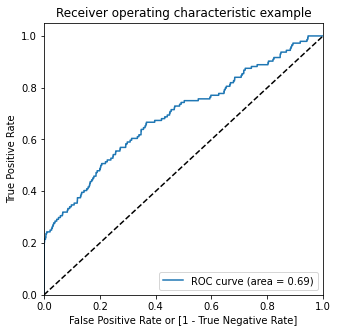

In [387]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Descission Tree

In [388]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [389]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.176359      0.009757         0.024898        0.016280   
1       0.184587      0.022984         0.020866        0.004909   
2       0.183782      0.034748         0.026235        0.012614   
3       0.202438      0.010056         0.011532        0.002210   
4       0.331529      0.016274         0.015879        0.005736   
5       0.302258      0.010139         0.012025        0.001177   
6       0.283366      0.032102         0.009305        0.001699   
7       0.214978      0.004994         0.007314        0.001245   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.679081   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.679081   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.695581   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.695581   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.680996   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.676062   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.681143   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.680995   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.667521           0.638418         0.661673        0.017108   
1           0.667225           0.638302         0.661536        0.017127   
2           0.681703           0.637538         0.671607        0.024748   
3           0.681703           0.637538         0.671607        0.024748   
4           0.690880           0.652220         0.674699        0.016399   
5           0.691135           0.652252         0.673150        0.016007   
6           0.697878           0.654482         0.677834        0.017870   
7           0.697872           0.663835         0.680901        0.013896   

   rank_test_score  
0                7  
1                8  
2                5  
3                5  
4                3  
5                4  
6                2  
7                1

In [390]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.6809005381145585
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [391]:

# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [392]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 40.25%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     58196
           1       1.00      0.25      0.40       512

    accuracy                           0.99     58708
   macro avg       1.00      0.63      0.70     58708
weighted avg       0.99      0.99      0.99     58708



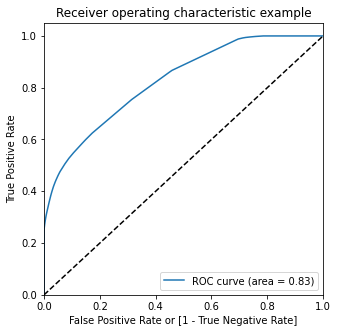

In [393]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [394]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 32.56%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14533
           1       1.00      0.19      0.33       144

    accuracy                           0.99     14677
   macro avg       1.00      0.60      0.66     14677
weighted avg       0.99      0.99      0.99     14677



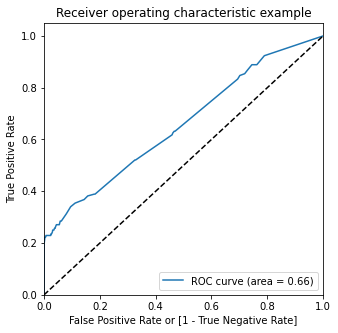

In [395]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost

In [396]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [397]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.787769      0.045779         0.024108        0.000242   
1       3.322750      0.214206         0.035905        0.000816   
2       3.874992      0.049378         0.039972        0.001632   
3       2.557364      0.078471         0.026432        0.006803   
4       3.668311      0.088394         0.042589        0.010155   
5       3.956748      0.049106         0.038798        0.006159   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.704009   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.713910   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.702214   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.694423   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.691876   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.700203   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.690092           0.704179         0.699427        0.006601   
1           0.712727           0.690520         0.705719        0.010758   
2           0.709796           0.682765         0.698258        0.011384   
3           0.696564           0.668585         0.686524        0.012715   
4           0.703970           0.679529         0.691792        0.009978   
5           0.706397           0.691503         0.699368        0.006109   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.864682            0.875737   
1                1            0.892868            0.890970   
2                4            0.901166            0.899412   
3                6            0.894808            0.889958   
4                5            0.926423            0.934887   
5                3            0.948904            0.948516   

   split2_train_score  mean_train_score  std_train_score  
0            0.868829          0.869749         0.004560  
1            0.890922          0.891586         0.000906  
2            0.891755          0.897444         0.004086  
3            0.894647          0.893138         0.002249  
4            0.928433          0.929914         0.003611  
5            0.941093          0.946171         0.003594

In [398]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.7057189667602041
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [399]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [400]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[19:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [401]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 44.38%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     58196
           1       1.00      0.29      0.44       512

    accuracy                           0.99     58708
   macro avg       1.00      0.64      0.72     58708
weighted avg       0.99      0.99      0.99     58708



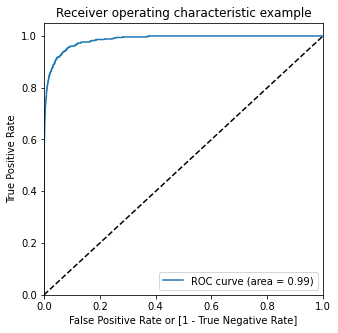

In [402]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [403]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 33.33%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     14533
           1       0.97      0.20      0.33       144

    accuracy                           0.99     14677
   macro avg       0.98      0.60      0.66     14677
weighted avg       0.99      0.99      0.99     14677



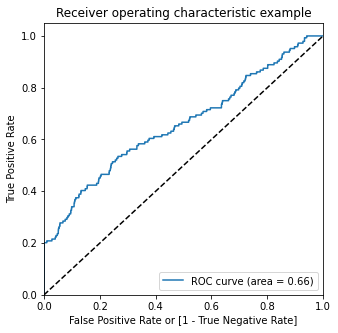

In [551]:
#### Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. Random Forest Classifier

In [553]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [554]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9630098264188757
RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [556]:
# Model with optimal hyperparameters
rf_over_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [557]:
# Predictions on the train set
y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 85.77%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     58196
           1       0.91      0.81      0.86     58196

    accuracy                           0.87    116392
   macro avg       0.87      0.87      0.87    116392
weighted avg       0.87      0.87      0.87    116392



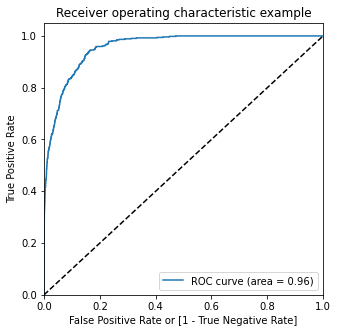

In [558]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [559]:
# Evaluating model on the test data
y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 6.8%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     14533
           1       0.04      0.31      0.07       144

    accuracy                           0.92     14677
   macro avg       0.52      0.62      0.51     14677
weighted avg       0.98      0.92      0.95     14677



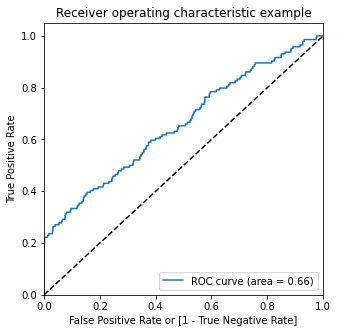

In [560]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model building with balancing Classes

# Random Oversampling

In [408]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [409]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 58196, 1: 512})
New class distribution:- Counter({0: 58196, 1: 58196})


## 1. Logistic Regrassion

In [410]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6945457710589757
Best hyperparameters:  {'C': 1000}


In [411]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.272993      0.020284         0.017922        0.003703    0.01   
1       0.329591      0.070309         0.021095        0.005756     0.1   
2       0.461716      0.110486         0.020400        0.002761       1   
3       0.539775      0.110544         0.020088        0.006777      10   
4       0.552268      0.108802         0.021143        0.005610     100   
5       0.535003      0.118385         0.016891        0.004136    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.695184           0.691211           0.685057   
1   {'C': 0.1}           0.696282           0.692758           0.685993   
2     {'C': 1}           0.696402           0.692996           0.686093   
3    {'C': 10}           0.696708           0.693363           0.686105   
4   {'C': 100}           0.698041           0.694850           0.686108   
5  {'C': 1000}           0.698977           0.695891           0.686107   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.689488  ...         0.691149        0.003729                6   
1           0.690472  ...         0.692310        0.003826                5   
2           0.690610  ...         0.692462        0.003843                4   
3           0.690917  ...         0.692722        0.003943                3   
4           0.692213  ...         0.693823        0.004419                2   
5           0.692999  ...         0.694546        0.004749                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.690313            0.690680            0.692917   
1            0.691523            0.691791            0.694148   
2            0.691671            0.691942            0.694271   
3            0.692025            0.692257            0.694287   
4            0.693404            0.693569            0.694289   
5            0.694298            0.694509            0.694289   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.692051            0.690432          0.691278         0.001028  
1            0.693248            0.691565          0.692455         0.001058  
2            0.693414            0.691735          0.692607         0.001049  
3            0.693739            0.692052          0.692872         0.000951  
4            0.695125            0.693427          0.693963         0.000665  
5            0.696055            0.694330          0.694696         0.000684  

[6 rows x 21 columns]

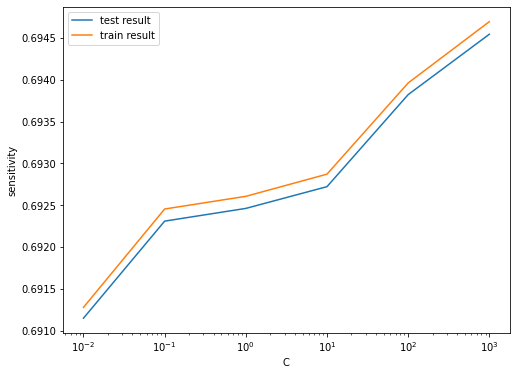

In [412]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [413]:
model_cv.best_params_

{'C': 1000}

In [414]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [415]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [416]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 61.19%
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.66      0.64     58196
           1       0.63      0.59      0.61     58196

    accuracy                           0.62    116392
   macro avg       0.62      0.62      0.62    116392
weighted avg       0.62      0.62      0.62    116392



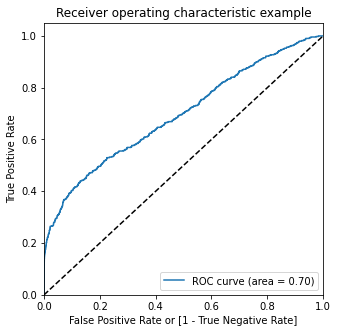

In [417]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [418]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 3.53%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.65      0.79     14533
           1       0.02      0.65      0.04       144

    accuracy                           0.65     14677
   macro avg       0.51      0.65      0.41     14677
weighted avg       0.99      0.65      0.78     14677



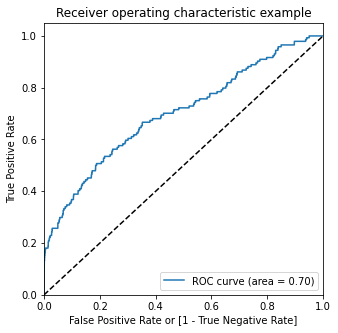

In [419]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Decision Tree

In [420]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [421]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8907338195555683
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [422]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [423]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 79.94%
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     58196
           1       0.79      0.81      0.80     58196

    accuracy                           0.80    116392
   macro avg       0.80      0.80      0.80    116392
weighted avg       0.80      0.80      0.80    116392



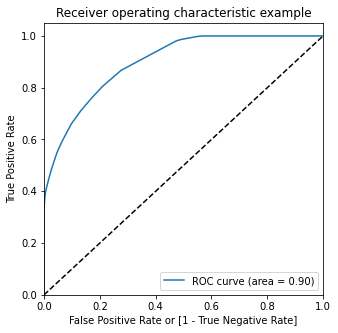

In [424]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [425]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 3.22%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87     14533
           1       0.02      0.38      0.03       144

    accuracy                           0.78     14677
   macro avg       0.50      0.58      0.45     14677
weighted avg       0.98      0.78      0.87     14677



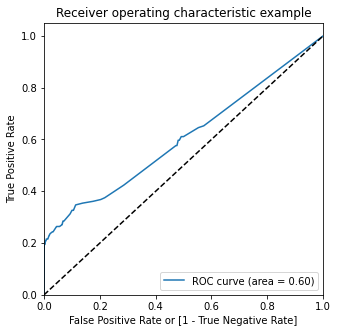

In [426]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost 

In [432]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [433]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.614443      0.344154         0.081321        0.019413   
1       6.603478      0.212811         0.086545        0.026568   
2       7.506003      0.687545         0.071619        0.007922   
3       5.762398      0.241754         0.076152        0.014778   
4       6.255820      0.452752         0.070050        0.009716   
5       6.693802      0.728182         0.065337        0.007629   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.898819   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.894551   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.888973   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.961046   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.963594   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.961609   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.901151           0.904645         0.901538        0.002394   
1           0.903768           0.896478         0.898266        0.003969   
2           0.900049           0.891921         0.893647        0.004684   
3           0.962198           0.965700         0.962981        0.001979   
4           0.966173           0.960075         0.963280        0.002499   
5           0.961557           0.961951         0.961706        0.000175   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.903705            0.903198   
1                5            0.898641            0.906195   
2                6            0.892332            0.903060   
3                2            0.964229            0.964307   
4                1            0.965788            0.967891   
5                3            0.963989            0.965025   

   split2_train_score  mean_train_score  std_train_score  
0            0.906157          0.904354         0.001292  
1            0.898516          0.901117         0.003591  
2            0.894015          0.896469         0.004711  
3            0.967017          0.965184         0.001297  
4            0.963035          0.965571         0.001989  
5            0.964647          0.964554         0.000428

In [434]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9632804285190133
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [435]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [436]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

[19:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [437]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 98.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     58196
           1       0.98      1.00      0.99     58196

    accuracy                           0.99    116392
   macro avg       0.99      0.99      0.99    116392
weighted avg       0.99      0.99      0.99    116392



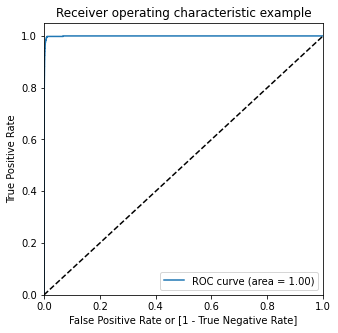

In [438]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [439]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 11.39%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     14533
           1       0.08      0.24      0.11       144

    accuracy                           0.96     14677
   macro avg       0.53      0.60      0.55     14677
weighted avg       0.98      0.96      0.97     14677



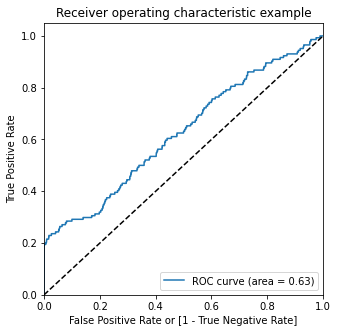

In [440]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. Random Forest

In [561]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [562]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9622352878155646
RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [563]:
# Model with optimal hyperparameters
rf_over_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [564]:
# Predictions on the train set
y_train_pred = rf_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 85.77%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     58196
           1       0.91      0.81      0.86     58196

    accuracy                           0.87    116392
   macro avg       0.87      0.87      0.87    116392
weighted avg       0.87      0.87      0.87    116392



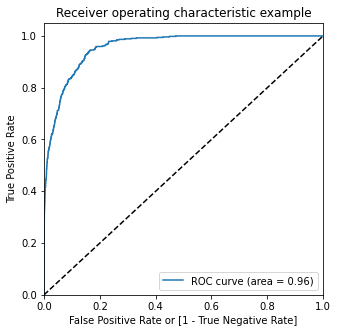

In [565]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [566]:
# Evaluating model on the test data
y_test_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 6.8%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     14533
           1       0.04      0.31      0.07       144

    accuracy                           0.92     14677
   macro avg       0.52      0.62      0.51     14677
weighted avg       0.98      0.92      0.95     14677



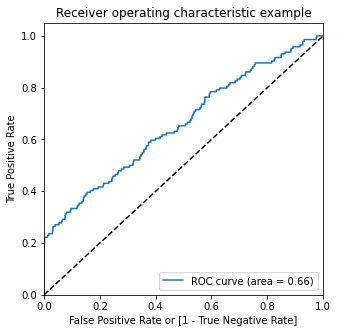

In [567]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# SMOTE (Synthetic Minority Oversampling Technique)

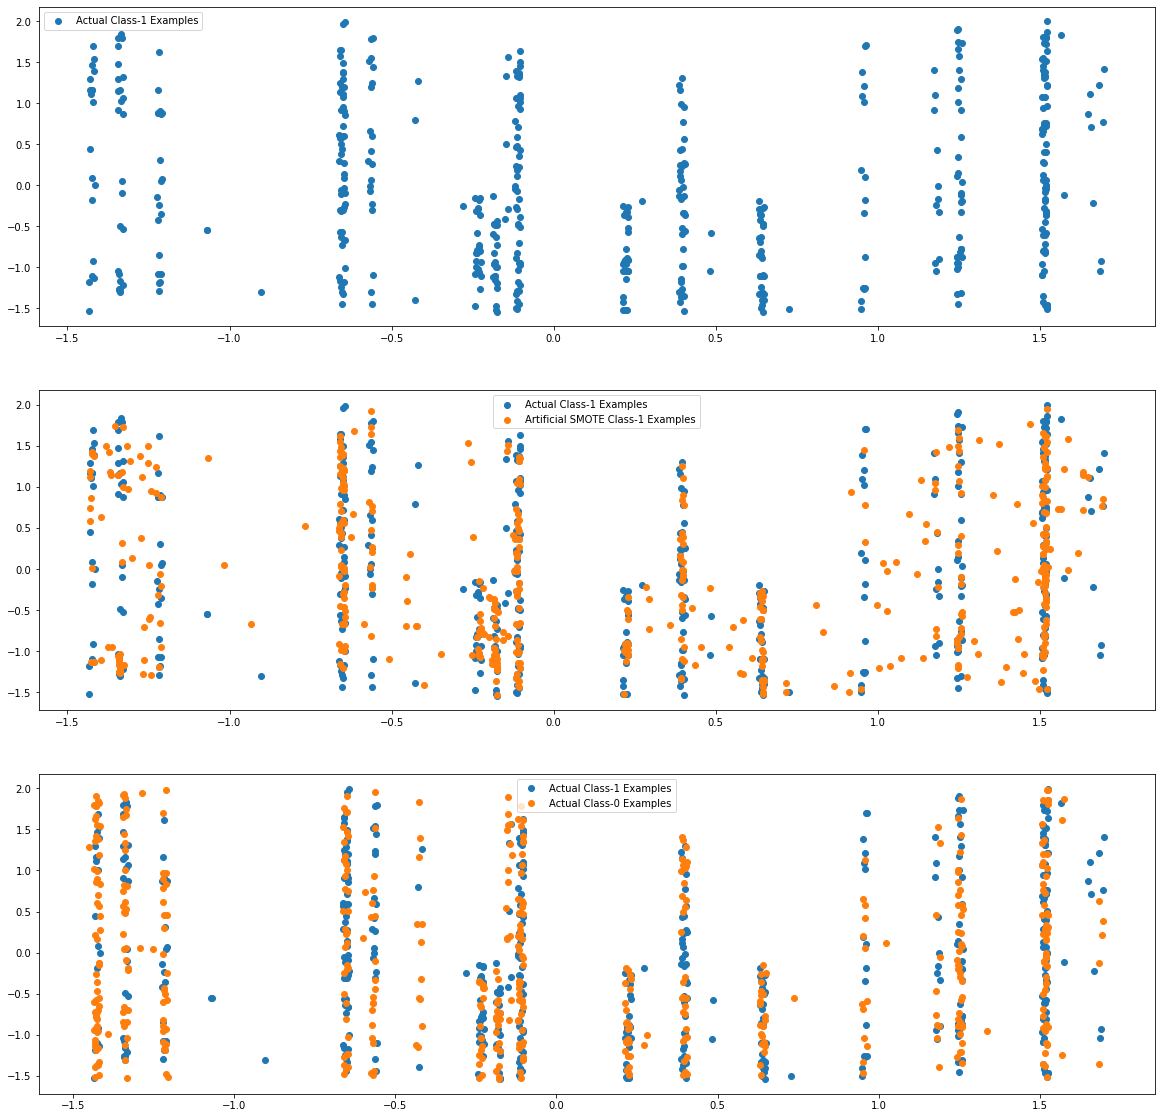

In [443]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## 1. Logistic Regression

In [442]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6967463937171944
Best hyperparameters:  {'C': 1000}


In [444]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.278887      0.018491         0.025383        0.004300    0.01   
1       0.348448      0.074953         0.023163        0.002069     0.1   
2       0.319060      0.070159         0.021492        0.002130       1   
3       0.362239      0.094457         0.022842        0.005180      10   
4       0.430732      0.147257         0.021243        0.004002     100   
5       0.372384      0.185831         0.018382        0.005072    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.697670           0.685920           0.694040   
1   {'C': 0.1}           0.699421           0.687691           0.695631   
2     {'C': 1}           0.699622           0.687903           0.695825   
3    {'C': 10}           0.699641           0.687922           0.696063   
4   {'C': 100}           0.699643           0.687925           0.697125   
5  {'C': 1000}           0.699643           0.687925           0.697833   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.694357  ...         0.694012        0.004370                6   
1           0.695972  ...         0.695661        0.004317                5   
2           0.696156  ...         0.695850        0.004305                4   
3           0.696175  ...         0.695971        0.004358                3   
4           0.696177  ...         0.696427        0.004617                2   
5           0.696177  ...         0.696746        0.004837                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.693141            0.695864            0.694283   
1            0.694766            0.697494            0.695972   
2            0.694942            0.697670            0.696188   
3            0.694958            0.697688            0.696475   
4            0.694960            0.697689            0.697740   
5            0.694960            0.697689            0.698645   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.694132            0.693182          0.694120         0.000991  
1            0.695794            0.694846          0.695774         0.000987  
2            0.695969            0.695027          0.695959         0.000988  
3            0.695987            0.695326          0.696087         0.000957  
4            0.695988            0.696529          0.696581         0.001054  
5            0.695988            0.697390          0.696934         0.001303  

[6 rows x 21 columns]

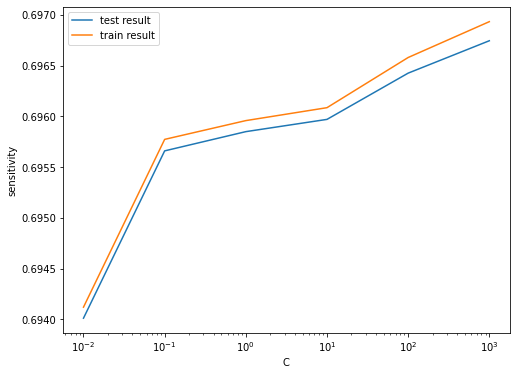

In [445]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [446]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [447]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=1000)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

In [448]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 60.6%
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.65      0.63     58196
           1       0.63      0.58      0.61     58196

    accuracy                           0.62    116392
   macro avg       0.62      0.62      0.62    116392
weighted avg       0.62      0.62      0.62    116392



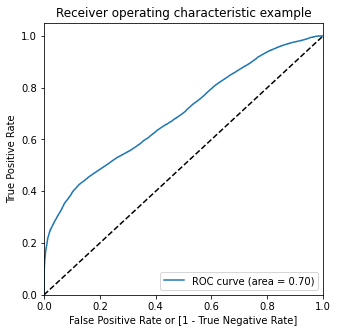

In [449]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [450]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 3.54%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.65      0.79     14533
           1       0.02      0.65      0.04       144

    accuracy                           0.65     14677
   macro avg       0.51      0.65      0.41     14677
weighted avg       0.99      0.65      0.78     14677



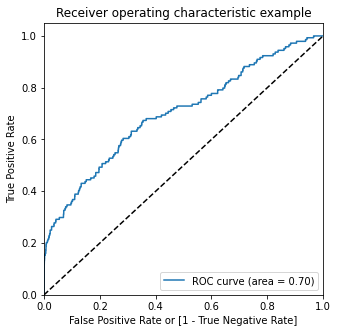

In [451]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

## 2. Decision Tree 

In [452]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [453]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.866240969703386
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [454]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [455]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [456]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 70.72%
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.98      0.81     58196
           1       0.96      0.56      0.71     58196

    accuracy                           0.77    116392
   macro avg       0.83      0.77      0.76    116392
weighted avg       0.83      0.77      0.76    116392



In [457]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 12.76%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     14533
           1       0.09      0.24      0.13       144

    accuracy                           0.97     14677
   macro avg       0.54      0.61      0.56     14677
weighted avg       0.98      0.97      0.98     14677



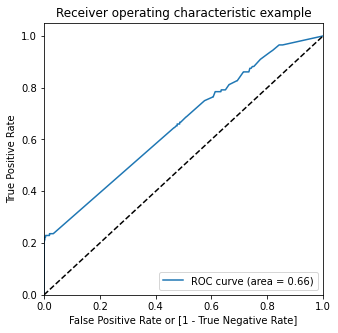

In [458]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

## 3. XGBoost

In [459]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [460]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.656499      0.190313         0.071170        0.002534   
1       7.056287      0.104067         0.060749        0.007217   
2       7.029798      0.635886         0.063546        0.006512   
3       5.399910      0.362868         0.072946        0.004042   
4       6.021367      0.181942         0.050133        0.008164   
5       7.324316      0.312805         0.067622        0.005078   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.983326   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.982027   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.980735   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.990325   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.990407   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.990382   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.989064           0.989515         0.987302        0.002817   
1           0.988604           0.988686         0.986439        0.003120   
2           0.987199           0.987909         0.985281        0.003228   
3           0.996613           0.995736         0.994225        0.002780   
4           0.996175           0.996997         0.994526        0.002932   
5           0.996471           0.997167         0.994674        0.003048   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.989856            0.987181   
1                5            0.988688            0.986738   
2                6            0.987326            0.985140   
3                3            0.996791            0.994615   
4                2            0.997174            0.994224   
5                1            0.997166            0.994724   

   split2_train_score  mean_train_score  std_train_score  
0            0.986514          0.987850         0.001444  
1            0.985900          0.987109         0.001168  
2            0.984851          0.985773         0.001105  
3            0.993417          0.994941         0.001396  
4            0.994433          0.995277         0.001344  
5            0.994512          0.995467         0.001204

In [461]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9946735675167387
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [462]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [463]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[19:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [464]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.15%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     58196
           1       1.00      0.99      0.99     58196

    accuracy                           0.99    116392
   macro avg       0.99      0.99      0.99    116392
weighted avg       0.99      0.99      0.99    116392



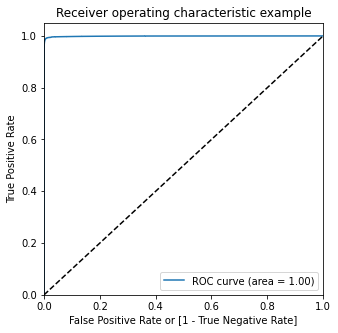

In [465]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [466]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 26.96%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14533
           1       0.36      0.22      0.27       144

    accuracy                           0.99     14677
   macro avg       0.68      0.61      0.63     14677
weighted avg       0.99      0.99      0.99     14677



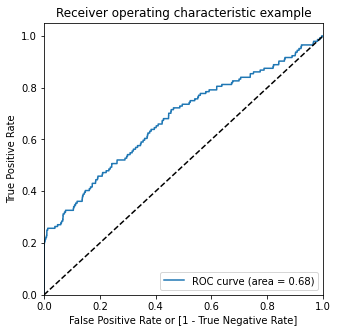

In [467]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4.Random Forest

In [543]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [544]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.923289345110299
RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [545]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [546]:
# Model with optimal hyperparameters
rf_smote_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [547]:
# Predictions on the train set
y_train_pred_smote = rf_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 81.06%
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     58196
           1       0.90      0.74      0.81     58196

    accuracy                           0.83    116392
   macro avg       0.84      0.83      0.83    116392
weighted avg       0.84      0.83      0.83    116392



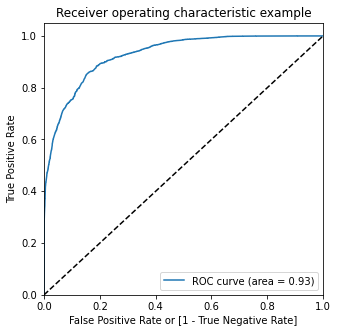

In [548]:
# Predicted probability
y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [549]:
# Evaluating model on the test data
y_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 6.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     14533
           1       0.03      0.31      0.06       144

    accuracy                           0.90     14677
   macro avg       0.51      0.61      0.50     14677
weighted avg       0.98      0.90      0.94     14677



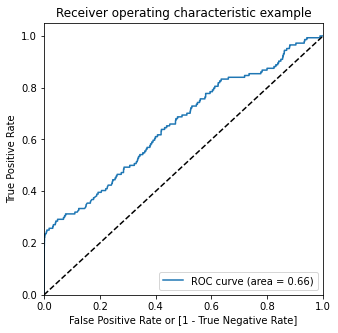

In [550]:
# Predicted probability
y_test_pred_smote = rf_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

# ADASYN (Adaptive Synthetic Sampling) 

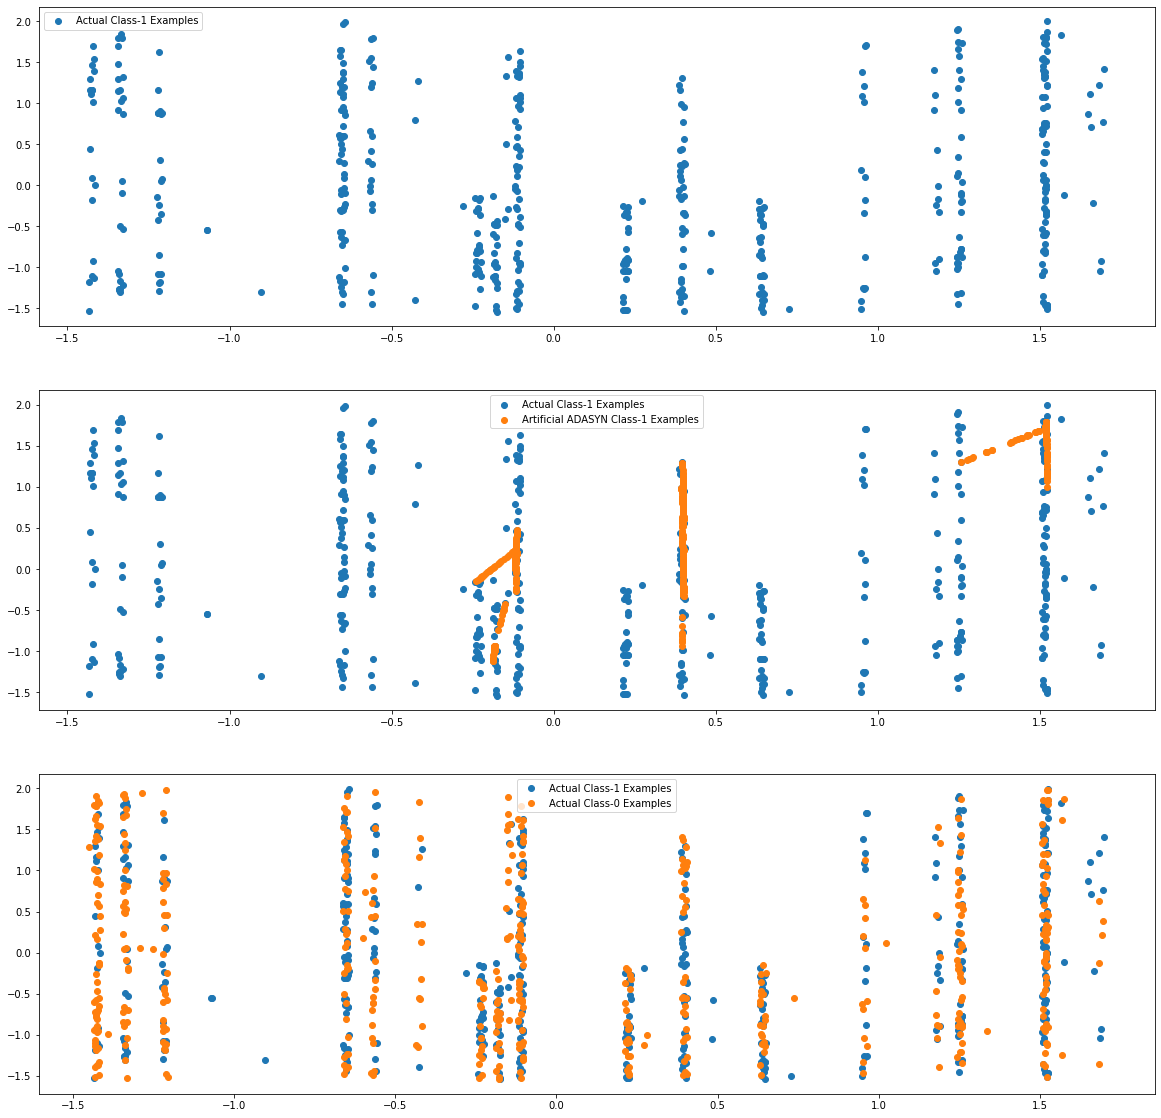

In [468]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [568]:
#check the disribution of both the labels
train_label, train_count = np.unique(y_train_adasyn, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(y_train_adasyn))

Label Distributions: 

[0.49972522 0.50027478]


## Logistic Regression

In [469]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.6677204495938757
Best hyperparameters:  {'C': 1000}


In [470]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.214514      0.022761         0.024553        0.005986    0.01   
1       0.239261      0.044353         0.031614        0.000704     0.1   
2       0.299462      0.093185         0.036269        0.004768       1   
3       0.301728      0.111939         0.032358        0.002400      10   
4       0.348378      0.136334         0.035748        0.002078     100   
5       0.316269      0.115630         0.028509        0.002868    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.665112           0.664931           0.663774   
1   {'C': 0.1}           0.667306           0.666774           0.665888   
2     {'C': 1}           0.667508           0.666929           0.666091   
3    {'C': 10}           0.667526           0.667229           0.666110   
4   {'C': 100}           0.667528           0.668615           0.666113   
5  {'C': 1000}           0.667528           0.669521           0.666113   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.664606        0.000593                6            0.664037   
1         0.666656        0.000585                5            0.666051   
2         0.666843        0.000582                4            0.666233   
3         0.666955        0.000610                3            0.666250   
4         0.667418        0.001024                2            0.666252   
5         0.667720        0.001398                1            0.666252   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.664890            0.665534          0.664820         0.000613  
1            0.667057            0.667529          0.666879         0.000617  
2            0.667285            0.667697          0.667072         0.000616  
3            0.667635            0.667711          0.667199         0.000671  
4            0.669254            0.667713          0.667739         0.001226  
5            0.670439            0.667713          0.668134         0.001735

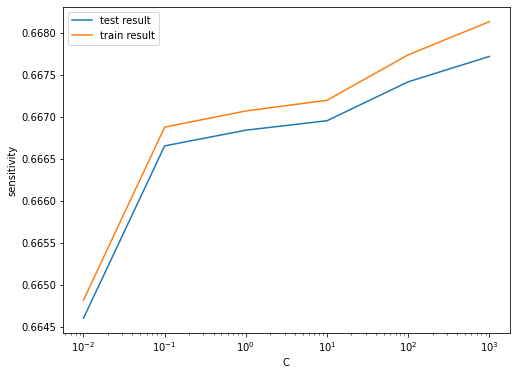

In [471]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [472]:
model_cv.best_params_

{'C': 1000}

In [473]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [474]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 59.46%
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.62      0.61     58196
           1       0.61      0.58      0.59     58260

    accuracy                           0.60    116456
   macro avg       0.60      0.60      0.60    116456
weighted avg       0.60      0.60      0.60    116456



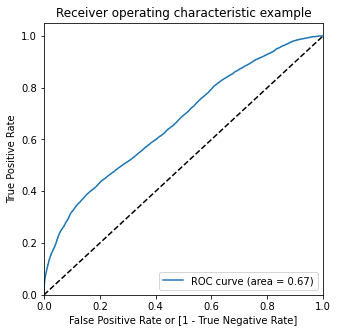

In [475]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [476]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.28%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.61      0.76     14533
           1       0.02      0.67      0.03       144

    accuracy                           0.61     14677
   macro avg       0.51      0.64      0.40     14677
weighted avg       0.99      0.61      0.75     14677



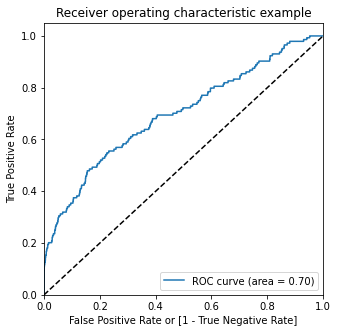

In [477]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Decision Tree

In [478]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [479]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.8275035567451214
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [481]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [482]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 78.52%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.56      0.69     58196
           1       0.68      0.93      0.79     58260

    accuracy                           0.75    116456
   macro avg       0.78      0.75      0.74    116456
weighted avg       0.78      0.75      0.74    116456



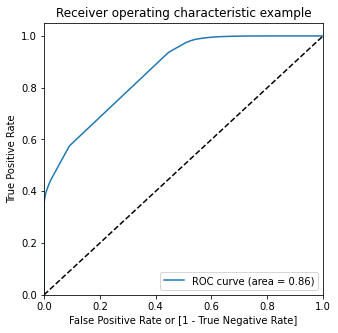

In [483]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [484]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 2.71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.56      0.72     14533
           1       0.01      0.62      0.03       144

    accuracy                           0.56     14677
   macro avg       0.50      0.59      0.37     14677
weighted avg       0.98      0.56      0.71     14677



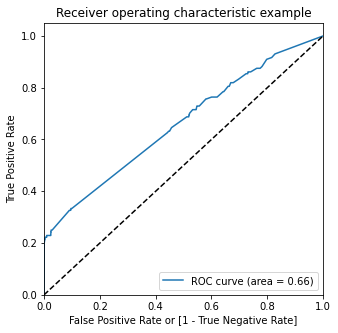

In [485]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost 

In [486]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [487]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.349467      0.680436         0.044289        0.001844   
1       5.316074      0.708097         0.040404        0.002819   
2       5.863696      0.343597         0.051284        0.000889   
3       4.754089      0.209894         0.068183        0.007164   
4       6.415119      0.080807         0.070159        0.005375   
5       7.014440      0.555757         0.056696        0.011155   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.978344   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.977949   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.976832   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.983683   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.984715   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.984753   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.981828           0.980835         0.980336        0.001465   
1           0.979248           0.980914         0.979370        0.001214   
2           0.979806           0.980100         0.978913        0.001476   
3           0.990255           0.988780         0.987573        0.002816   
4           0.989653           0.987847         0.987405        0.002040   
5           0.989594           0.989206         0.987851        0.002196   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.988912            0.986276   
1                5            0.989284            0.985404   
2                6            0.988053            0.985566   
3                2            0.997248            0.994892   
4                3            0.997722            0.994648   
5                1            0.997857            0.995135   

   split2_train_score  mean_train_score  std_train_score  
0            0.985101          0.986763         0.001593  
1            0.985097          0.986595         0.001905  
2            0.983775          0.985798         0.001754  
3            0.993862          0.995334         0.001417  
4            0.994230          0.995534         0.001557  
5            0.994655          0.995882         0.001410

In [488]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9878508968587242
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [489]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [490]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[19:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [491]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.31%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     58196
           1       1.00      0.99      0.99     58260

    accuracy                           0.99    116456
   macro avg       0.99      0.99      0.99    116456
weighted avg       0.99      0.99      0.99    116456



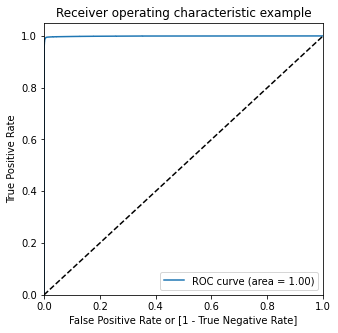

In [492]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [493]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 24.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14533
           1       0.31      0.20      0.24       144

    accuracy                           0.99     14677
   macro avg       0.65      0.60      0.62     14677
weighted avg       0.99      0.99      0.99     14677



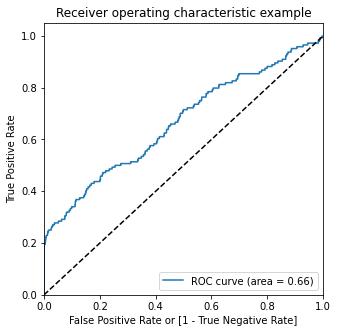

In [494]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4.Random Forest

In [536]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [537]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.882311166003034
RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [538]:
# Model with optimal hyperparameters
rf_adasyn_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [539]:
# Evaluating model on the test data
y_train_pred = rf_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 84.86%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83     58196
           1       0.81      0.89      0.85     58260

    accuracy                           0.84    116456
   macro avg       0.84      0.84      0.84    116456
weighted avg       0.84      0.84      0.84    116456



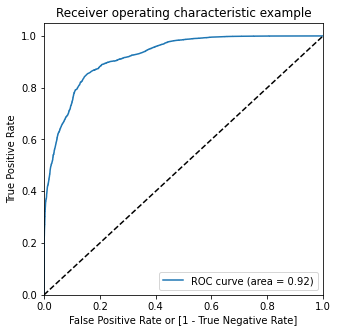

In [540]:
# Predicted probability
y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [541]:
# Evaluating model on the test data
y_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.75%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     14533
           1       0.02      0.42      0.04       144

    accuracy                           0.79     14677
   macro avg       0.51      0.61      0.46     14677
weighted avg       0.98      0.79      0.87     14677



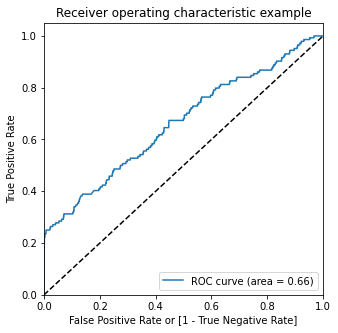

In [542]:
# Predicted probability
y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)